In [86]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

$-\frac{d^2u}{dx^2} + 100\frac{du}{dx} = 0,  0 < x < 1, $ <br>
$u(0) = 0, u(1) = 1$

In [87]:
import runge_kutta as rk
rk_4 = rk.runge_kutta_function(4)
rk_8 = rk.runge_kutta_function(8)

In [88]:
def equation(U):
    return np.array([U[1], 100 * U[1]])

In [111]:
h = 1e-3
N = int(1. / h)
x = np.linspace(0, 1, N)
U_ex = (np.exp(100 * x) - 1) / (np.exp(100) - 1)
delta = 1e-10

In [112]:
def solve(U_0):
    U = np.zeros((N, U_0.size))
    U[0, :] = U_0.copy()
    for i in range(N - 1):
        U[i + 1, :] = rk_4(U[i, :], h, equation, ())
    return U
def test_param(p):
    U = solve(np.array([0., p]))
    return 1 - U[-1, 0]

In [113]:
import central_diference as cd
cd_2 = cd.generate_cd(2).get_cd_as_function()
cd_4 = cd.generate_cd(4).get_cd_as_function()

In [114]:
p0 = 1e-30
def dfdp(p_0):
    dp = p_0 / 100
    P = np.array([test_param(p_0 - 2 * dp),
                  test_param(p_0 - dp),
                  0,
                  test_param(p_0 + dp),
                  test_param(p_0 + 2 * dp)])
    """
    P = np.array([test_param(p_0 - dp),
                  0,
                  test_param(p_0 + dp)])
    """
    #return cd_2(P, dp)[1]
    return cd_4(P, dp)[2]

In [115]:
def newthon(x0, N_max):
    X = np.zeros(N_max)
    X[0] = x0
    for i in trange(N_max):
        if i == 0: continue
        X[i] = X[i - 1] - test_param(X[i - 1]) / dfdp(X[i - 1])
    return X

In [116]:
p0 = 1e-30
P = newthon(p0 * 10, 20)

100%|██████████| 20/20 [00:03<00:00,  5.72it/s]


U_ex =  1.0000000000000022
p_ex =  4.1116347264043344e-42


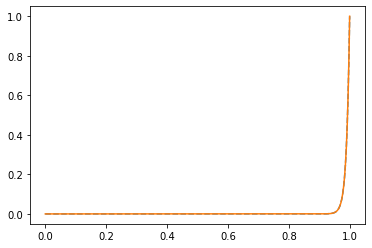

In [117]:
U = solve(np.array([0., P[-1]]))
plt.plot(x, U_ex, '--', label = 'U_ex');
plt.plot(x, U[:, 0], label = 'U');
print("U_ex = ", U[-1, 0])
print("p_ex = ", P[-1])